# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

#   Arquivos

In [2]:
path_covid_19_clean = r'C:\Users\angel\Desktop\Data science\GitHub\GitHub\btc2-blue-g4\src\Dados\kaggle\covid_19_clean_complete.csv'
path_worldmeter = r'C:\Users\angel\Desktop\Data science\GitHub\GitHub\btc2-blue-g4\src\Dados\kaggle\worldometer_data.csv'
path_country_wise = r'C:\Users\angel\Desktop\Data science\GitHub\GitHub\btc2-blue-g4\src\Dados\kaggle\country_wise_latest.csv'
path_full_grouped = r'C:\Users\angel\Desktop\Data science\GitHub\GitHub\btc2-blue-g4\src\Dados\kaggle\full_grouped.csv'

# Funções

In [3]:
'''
Input:
        3 parametros, um para cada um dos 3 datasets usados para a junção em apenas um, dataset covid_19_clean, worldmeter e full_grouped;

Função:
        Junta os 3 em duas etapas, uma criando um df3, aonde baseado no pais do dataset covid_19_clean, 
        ele recebe as informações de continente e população, vindos
        do dataset worldmeter.

        Para gerar o df4, o df3 é juntado com o df full_grouped, recebendo "New cases","New deaths".

        Ainda são removidos algumas colunas e criadas as colunas , "month e "day".

        Colunas são reordenadas.

output: 
        Retorna o df final.

'''

def gerar_df(path_covid_19_clean,path_worldmeter, path_full_grouped):

    df0 = pd.read_csv(path_covid_19_clean)
    df1 = pd.read_csv(path_worldmeter)
    df2 = pd.read_csv(path_full_grouped )

    df3 = pd.merge(df0, df1[["Continent","Population","Country/Region"]], on=["Country/Region"], how="left")
    
    df4 = pd.merge(df3, df2[["New cases","New deaths","Date", "Country/Region"]], on=["Date","Country/Region" ], how="left")

    df4= df4.drop(["Lat","Long", 
                   "Province/State", 
                   "WHO Region"], axis=1)

    

    
    df4["Date"] = pd.to_datetime(df4["Date"])

    df4["day"] = df4['Date'].map(lambda x: x.day)
    df4["month"] = df4['Date'].map(lambda x: x.month)

    df4 = df4[["Country/Region",
            "Continent", 
            "Population",
            "Date", 
            "month",
            "day", 
            "Confirmed", 
            "Deaths", 
            "Recovered", "Active", 
            "New cases", 
            "New deaths"]]

    df4.rename(columns={
    'Province/State': 'province_state',
    'Country/Region': 'country_region',
    },inplace=True)

    df4.columns = df4.columns.str.lower()

           
    return df4
    


In [71]:
'''
Função que recebe o dataset e adiciona os continentes faltando e a população nos paises,
no final adiciona a deathrate para cada 100k habitantes
'''

def filling_nulls(df):
     

    if df["country_region"] == 'Brunei':
       df["continent"] = 'Asia' 
       df["population"] = 460345

    elif df["country_region"] == 'Central African Republic':
         df["continent"] = 'Africa' 
         df["population"] = 5454533

    elif df["country_region"] == 'China':
         df["continent"] = 'Asia' 
         df["population"] = 1411778724
          
    elif df["country_region"] == 'Congo (Brazzaville)':
         df["continent"] = 'Africa' 
         df["population"] = 5518000

    elif df["country_region"] == 'Congo (Kinshasa)':
         df["continent"] = 'Africa' 
         df["population"] = 89560000

    elif df["country_region"] == "Cote d'Ivoire":
         df["continent"] = 'Africa' 
         df["population"] = 27050000

    elif df["country_region"] == 'Holy See':
         df["continent"] = 'Europe' 
         df["population"] = 801
         
    elif df["country_region"] == 'South Korea':
         df["continent"] = 'Asia' 
         df["population"] = 51269185

    elif df["country_region"] == 'Saint Vincent and the Grenadines':
         df["continent"] = 'North America' 
         df["population"] = 111269

    elif df["country_region"] == 'Taiwan*':
         df["continent"] = 'Asia' 
         df["population"] = 23570000

    elif df["country_region"] == 'United Arab Emirates':
         df["continent"] = 'Asia' 
         df["population"] = 9890000

    elif df["country_region"] == 'United Kingdom':
         df["continent"] = 'Europe' 
         df["population"] = 67330000

    elif df["country_region"] == 'US':
         df["continent"] = 'North America' 
         df["population"] = 331900000
         
    elif df["country_region"] == 'West Bank and Gaza':
         df["continent"] = 'Asia' 
         df["population"] = 5101414 
    
    elif df["country_region"] == 'Kosovo':
         df["continent"] = 'Asia' 
         df["population"] = 1810000

    elif df["country_region"] == 'Burma':
         df["continent"] = 'Asia' 
         df["population"] = 54410000
     
    df["death / 100.000 hab"] = (df["deaths"]/df["population"])*100000
  
         
    return df

In [5]:
df = gerar_df(path_covid_19_clean,path_worldmeter, path_full_grouped)

In [6]:
df = df.apply(lambda x : filling_nulls(x), axis=1) 

In [7]:
df.head()

,country_region,continent,population,date,month,day,confirmed,deaths,recovered,active,new cases,new deaths,death / 100.000 hab
0,Afghanistan,Asia,39009447.0,2020-01-22,1,22,0,0,0,0,0,0,0.0
1,Albania,Europe,2877470.0,2020-01-22,1,22,0,0,0,0,0,0,0.0
2,Algeria,Africa,43926079.0,2020-01-22,1,22,0,0,0,0,0,0,0.0
3,Andorra,Europe,77278.0,2020-01-22,1,22,0,0,0,0,0,0,0.0
4,Angola,Africa,32956300.0,2020-01-22,1,22,0,0,0,0,0,0,0.0


# Visualização

In [8]:
country= df.loc[df.country_region == "Spain"]

In [9]:
country.head()

,country_region,continent,population,date,month,day,confirmed,deaths,recovered,active,new cases,new deaths,death / 100.000 hab
199,Spain,Europe,46756648.0,2020-01-22,1,22,0,0,0,0,0,0,0.0
460,Spain,Europe,46756648.0,2020-01-23,1,23,0,0,0,0,0,0,0.0
721,Spain,Europe,46756648.0,2020-01-24,1,24,0,0,0,0,0,0,0.0
982,Spain,Europe,46756648.0,2020-01-25,1,25,0,0,0,0,0,0,0.0
1243,Spain,Europe,46756648.0,2020-01-26,1,26,0,0,0,0,0,0,0.0


In [29]:
country.tail()

,country_region,continent,population,date,month,day,confirmed,deaths,recovered,active,new cases,new deaths,death / 100.000 hab
47962,Spain,Europe,46756648.0,2020-07-23,7,23,270166,28429,150376,91361,2615,3,60.802049
48223,Spain,Europe,46756648.0,2020-07-24,7,24,272421,28432,150376,93613,2255,3,60.808465
48484,Spain,Europe,46756648.0,2020-07-25,7,25,272421,28432,150376,93613,0,0,60.808465
48745,Spain,Europe,46756648.0,2020-07-26,7,26,272421,28432,150376,93613,0,0,60.808465
49006,Spain,Europe,46756648.0,2020-07-27,7,27,272421,28432,150376,93613,0,0,60.808465


<AxesSubplot: xlabel='date', ylabel='deaths'>

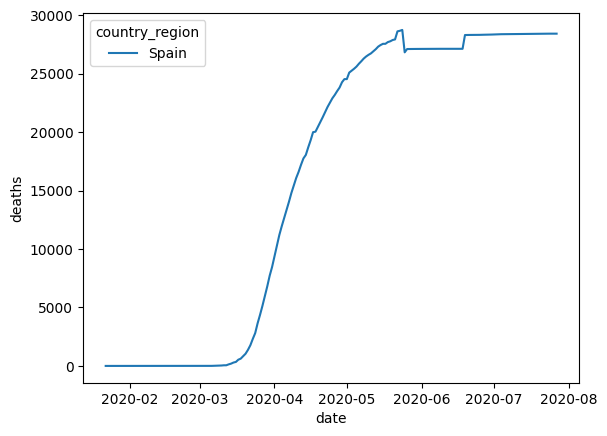

In [10]:
sns.lineplot(x="date", y="deaths", hue="country_region", data=country)

In [11]:
country["date"].info()

<class 'pandas.core.series.Series'>
Int64Index: 188 entries, 199 to 49006
Series name: date
Non-Null Count  Dtype         
--------------  -----         
188 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.9 KB


# Split

In [16]:
country

,country_region,continent,population,date,month,day,confirmed,deaths,recovered,active,new cases,new deaths,death / 100.000 hab
199,Spain,Europe,46756648.0,2020-01-22,1,22,0,0,0,0,0,0,0.000000
460,Spain,Europe,46756648.0,2020-01-23,1,23,0,0,0,0,0,0,0.000000
721,Spain,Europe,46756648.0,2020-01-24,1,24,0,0,0,0,0,0,0.000000
982,Spain,Europe,46756648.0,2020-01-25,1,25,0,0,0,0,0,0,0.000000
1243,Spain,Europe,46756648.0,2020-01-26,1,26,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47962,Spain,Europe,46756648.0,2020-07-23,7,23,270166,28429,150376,91361,2615,3,60.802049
48223,Spain,Europe,46756648.0,2020-07-24,7,24,272421,28432,150376,93613,2255,3,60.808465
48484,Spain,Europe,46756648.0,2020-07-25,7,25,272421,28432,150376,93613,0,0,60.808465
48745,Spain,Europe,46756648.0,2020-07-26,7,26,272421,28432,150376,93613,0,0,60.808465


In [33]:
train = country.loc[country.month < 7] #Treinando com dados anteriores a julho
test = country.loc[country.month == 7] #comparando com os valores reais de julho

In [52]:
#julho possui 27 dias no dataset

test.shape

(27, 13)

In [72]:

ytrain=train["deaths"] 
ytest=test["deaths"] 

ytrain2=train["confirmed"] 
ytest2=test["confirmed"] 

xtrain=train["date"]
xtest=test["date"]

# Train

In [48]:
step_fit_death = auto_arima(y=ytrain ,x=xtrain, trace= True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2189.941, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2266.340, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2212.282, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2187.428, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2188.019, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2188.075, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2187.986, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2189.428, Time=0.08 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.606 seconds


In [73]:
step_fit_confirmed = auto_arima(y=ytrain2 ,x=xtrain, trace= True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2783.438, Time=0.25 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2861.327, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2802.748, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2785.466, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2781.564, Time=0.11 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2781.402, Time=0.08 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=2782.662, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2782.338, Time=0.03 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=2782.078, Time=0.21 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=2783.400, Time=0.20 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 1.055 seconds


In [66]:
#modelo para mortes

model = ARIMA(endog=ytrain, order= (0,2,1))
model_fit = model.fit()

c:\Users\angel\Desktop\Data science\venv_bootcamp2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\Data science\venv_bootcamp2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\Data science\venv_bootcamp2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [74]:
#modelo para casos confirmados

model2 = ARIMA(endog=ytrain2, order= (0,2,2))
model2_fit = model2.fit()

c:\Users\angel\Desktop\Data science\venv_bootcamp2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\Data science\venv_bootcamp2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\Data science\venv_bootcamp2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#   Predict

In [79]:
pred_death = model_fit.forecast(27)  #avaliando os proximos 27 dias

c:\Users\angel\Desktop\Data science\venv_bootcamp2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [77]:
pred_confirmed = model2_fit.forecast(27) #avaliando os proximos 27 dias

c:\Users\angel\Desktop\Data science\venv_bootcamp2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [80]:
mae_death = mean_absolute_error(ytest, pred_death)
print(mae_death)

174.704123716021


In [82]:
mae_confirmed = mean_absolute_error(ytest2, pred_confirmed)
print(mae_confirmed)

5437.887931543182


#   Visualização dos resultados

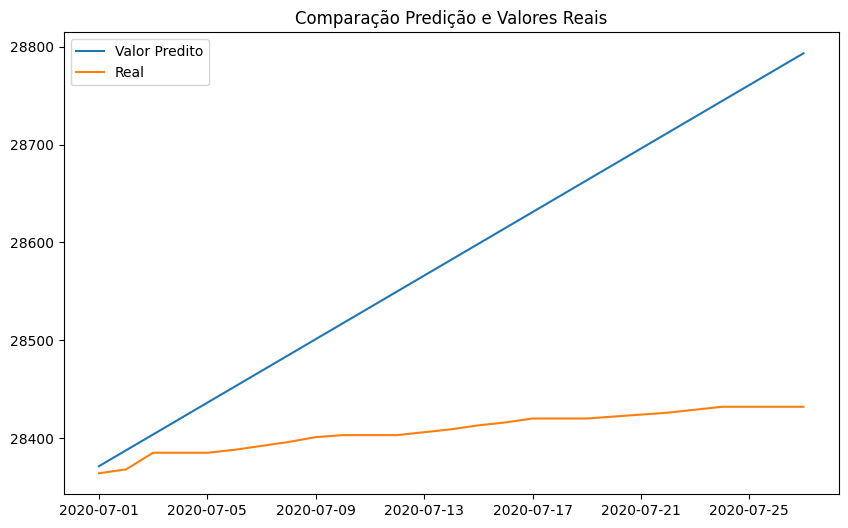

In [87]:
plt.figure(figsize=(10,6))
plt.title('Comparação Predição e Valores Reais', fontsize=12)
plt.plot(xtest,pred_death,label='Valor Predito')
plt.plot(xtest,ytest,label='Real')
plt.legend()

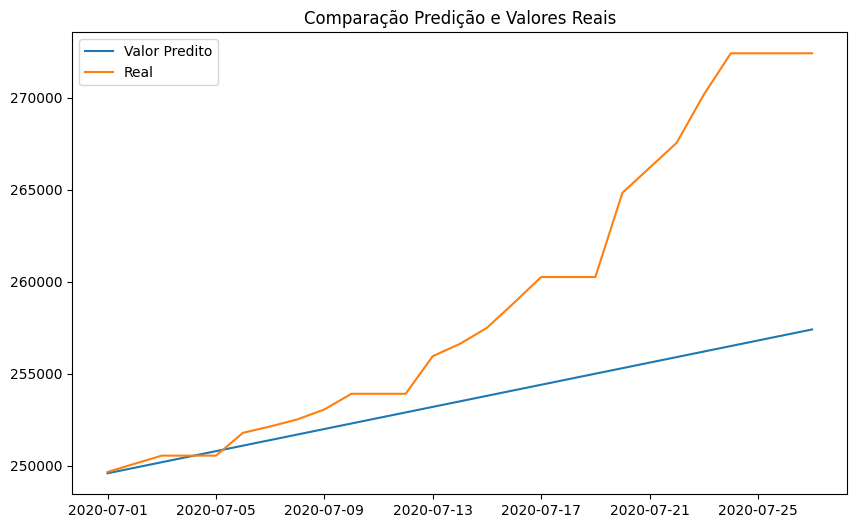

In [88]:
plt.figure(figsize=(10,6))
plt.title('Comparação Predição e Valores Reais', fontsize=12)
plt.plot(xtest,pred_confirmed,label='Valor Predito')
plt.plot(xtest,ytest2,label='Real')
plt.legend()